In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import urllib.request
import datetime
import re
from lxml import etree
import matplotlib.pyplot as plt
import seaborn as sns;

import requests
from bs4 import BeautifulSoup

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

aws_service_offerings = pd.read_json('https://pricing.us-east-1.amazonaws.com/offers/v1.0/aws/index.json')

aws_services = aws_service_offerings.offers.keys()

aws_services

cleaned_service_names = []
for service in aws_services:
    if "AmazonEI" in service:
        service ="SageMaker Elastic Inference".lower()
        cleaned_service_names.append(service)
    if "AmazonES" in service:
        service ="Elasticsearch Service".lower()
        cleaned_service_names.append(service)
    if "AWSXRay" in service:
        service ="X-Ray".lower()
        cleaned_service_names.append(service)
    if "AWSSystemsManager" in service:
        service ="Systems Manager".lower()
        cleaned_service_names.append(service)
    if "AWS" in service:
        service = service.replace("AWS", "").lower()
        cleaned_service_names.append(service)
    if "Amazon" in service:
        service = service.replace("Amazon", "").lower()
        cleaned_service_names.append(service)
#     if "IoT" in service:
#         service = re.sub(r'(?<!^)(?=[A-Z])', ' ', service).lower()
#         cleaned_service_names.append(service)
    if "Storage" in service:
        service = re.sub(r'(?<!^)(?=[A-Z])', ' ', service).lower().lower()
        cleaned_service_names.append(service)
    else:
        service = service.lower()
        cleaned_service_names.append(service)

# need to add some services missing from the AWS published services
# cleaned_service_names.append("aurora")
# cleaned_service_names.append("cdk")
# cleaned_service_names.append("elemental")
# cleaned_service_names.append("firewall manager")
# cleaned_service_names.append("augmented ai")
# cleaned_service_names.append("data lifecycle manager")
additional_services = ["aurora",
"cdk",
"elemental",
"firewall manager",
"augmented ai",
"data lifecycle manager",
"corretto",
"documentdb",
"ebs",
"emr",
"cassandra",
"route 53",
"eventbridge",
"blockchain",
"sqs",
"transit gateway",
"region",
"app mesh",
"cloud map",
"control tower",
"aws marketplace",
"deep learning",
"device farm",
"elastic beanstalk",
"api gateway",
"fraude detector",
"serverless application model",
"chatbot",
"database migration service",
"deepcomposer",
"iam",
"builders library",
"keyspaces",
"contact center",
"certificate manager",
"cost & usage",
"directory service",
"managed services",
"sam",
"well-architected tool",
"fraud detector",
"elastic load balancing",
"mediapackage",
"classroom",
"step functions"]
for item in additional_services:
    cleaned_service_names.append(item)
                       


cleaned_service_names = dict.fromkeys(cleaned_service_names)

aws_services = {}
for key, value in enumerate(cleaned_service_names):
    print(key, value)
    aws_services[value] = {"id": key}
    
print(aws_services)

0 a4b
1 amazonroute53regionalchina
2 amplify
3 appsync
4 backup
5 budgets
6 certificatemanager
7 cloudformation
8 cloudmap
9 cloudtrail
10 codeartifact
11 codecommit
12 codedeploy
13 codepipeline
14 config
15 costexplorer
16 dataexchange
17 datasync
18 datatransfer
19 databasemigrationsvc
20 deepracer
21 developersupport
22 devicefarm
23 directconnect
24 directoryservice
25 elb
26 elementalmediaconvert
27 elementalmedialive
28 elementalmediapackage
29 elementalmediastore
30 elementalmediatailor
31 events
32 fms
33 globalaccelerator
34 glue
35 greengrass
36 groundstation
37 iot
38 iot1click
39 iotanalytics
40 iotevents
41 iotsitewise
42 iotthingsgraph
43 lambda
44 mediaconnect
45 outposts
46 queueservice
47 robomaker
48 secretsmanager
49 securityhub
50 servicecatalog
51 shield
52 storagegateway
53 storagegatewaydeeparchive
54 supportbusiness
55 supportenterprise
56 systems manager
57 transfer
58 x-ray
59 alexatopsites
60 alexawebinfoservice
61 a2i
62 apigateway
63 appstream
64 athena
65

In [70]:
# process the whats new AWS page

url = "https://aws.amazon.com/about-aws/whats-new/2020/"
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')
# print(soup.prettify())

In [71]:
def clean_up(release_date):
    release_date = release_date.replace("Posted On: ", "")
    release_date = release_date.replace("\n", "")
    release_date = release_date.replace("              ", "")
    release_date = release_date.replace("             ", "")
    release_date = datetime.datetime.strptime(release_date, '%b %d, %Y')
    return release_date
    
service_releases = {}
count = 0
selected_whats_new = soup.findAll('li', {'class': 'directory-item text whats-new'})
for item in selected_whats_new:
    title = item.find('a').get_text().lower()
    release_date = item.find('div', {'class': 'date'}).get_text()
    id = 0
    for service, value in aws_services.items():
        if service in title:
            title = service
            id = value.get("id")
    cleaned_release_date = clean_up(release_date)    
    service_releases[count] = {"name": title, "release_date": cleaned_release_date, "id": int(id)}
    count = count + 1

for key, value in service_releases.items():
    print(key, value)


0 {'name': 'cloudformation', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 7}
1 {'name': 'rds', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 118}
2 {'name': 'cloudwatch', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 74}
3 {'name': 'ec2', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 82}
4 {'name': 'glue', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 34}
5 {'name': 'new aws solutions consulting offer - data-lake-as-a-service', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 0}
6 {'name': 'outposts', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 45}
7 {'name': 'codeguru', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 141}
8 {'name': 'lex', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 104}
9 {'name': 'new aws solutions consulting offer - demand ai', 'release_date': datetime.datetime(2020, 9, 8, 0, 0), 'id': 0}
10 {'name': 'aurora', 'release_date': datetime.datetime(2020, 

1060 {'name': 'aws adds the ability for customers to enable aws local zones themselves', 'release_date': datetime.datetime(2020, 3, 9, 0, 0), 'id': 0}
1061 {'name': 'cloudformation', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 7}
1062 {'name': 'blockchain', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 171}
1063 {'name': 'aws waf adds anonymous ip list for aws managed rules', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 0}
1064 {'name': 'robomaker', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 47}
1065 {'name': 'aws console mobile application launches a new android version', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 0}
1066 {'name': 'config', 'release_date': datetime.datetime(2020, 3, 6, 0, 0), 'id': 14}
1067 {'name': 'aurora', 'release_date': datetime.datetime(2020, 3, 5, 0, 0), 'id': 158}
1068 {'name': 'amplify', 'release_date': datetime.datetime(2020, 3, 5, 0, 0), 'id': 2}
1069 {'name': 'ecr', 'release_date': d

In [72]:
service_release_df = pd.DataFrame.from_dict(service_releases, orient='index')
service_release_df.head(25)

,name,release_date,id
0,cloudformation,2020-09-08,7
1,rds,2020-09-08,118
2,cloudwatch,2020-09-08,74
3,ec2,2020-09-08,82
4,glue,2020-09-08,34
5,new aws solutions consulting offer - data-lake...,2020-09-08,0
6,outposts,2020-09-08,45
7,codeguru,2020-09-08,141
8,lex,2020-09-08,104
9,new aws solutions consulting offer - demand ai,2020-09-08,0


In [73]:
timeseries = service_release_df.set_index('release_date')
timeseries.head()

,name,id
release_date,,
2020-09-08,cloudformation,7
2020-09-08,rds,118
2020-09-08,cloudwatch,74
2020-09-08,ec2,82
2020-09-08,glue,34


id
0      AxesSubplot(0.125,0.2;0.775x0.68)
2      AxesSubplot(0.125,0.2;0.775x0.68)
3      AxesSubplot(0.125,0.2;0.775x0.68)
4      AxesSubplot(0.125,0.2;0.775x0.68)
7      AxesSubplot(0.125,0.2;0.775x0.68)
                     ...                
198    AxesSubplot(0.125,0.2;0.775x0.68)
199    AxesSubplot(0.125,0.2;0.775x0.68)
200    AxesSubplot(0.125,0.2;0.775x0.68)
201    AxesSubplot(0.125,0.2;0.775x0.68)
202    AxesSubplot(0.125,0.2;0.775x0.68)
Length: 129, dtype: object

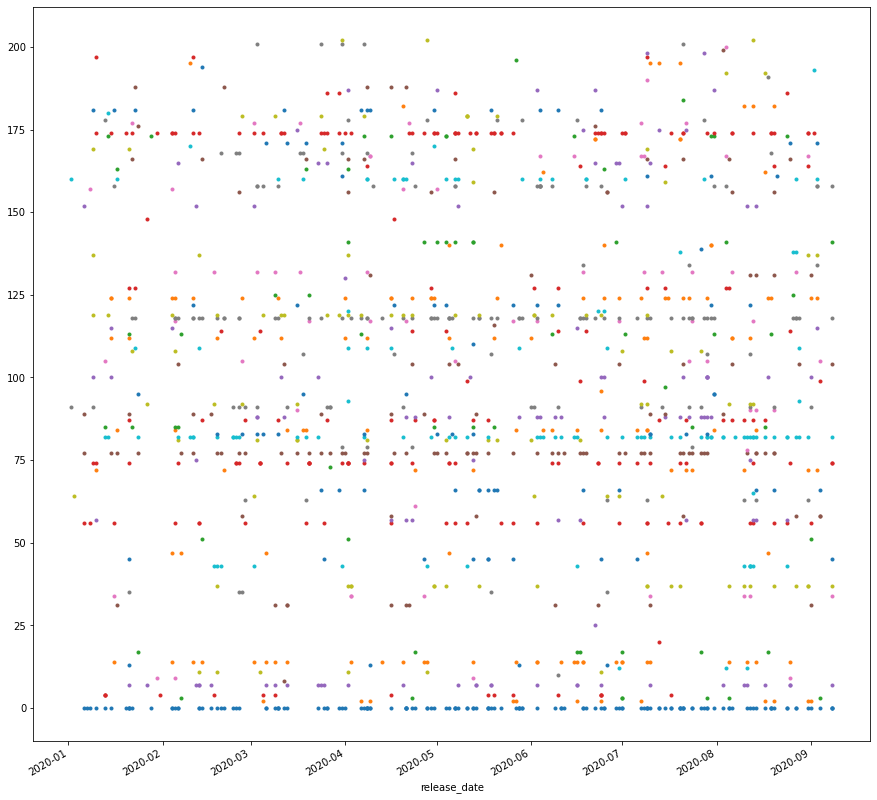

In [74]:
# timeseries.plot()
# plt.show()

# timeseries.plot.line(subplots=True)


fig, ax = plt.subplots(figsize=(15,15))
timeseries.groupby('id').plot(ax=ax, legend=False, style='.')


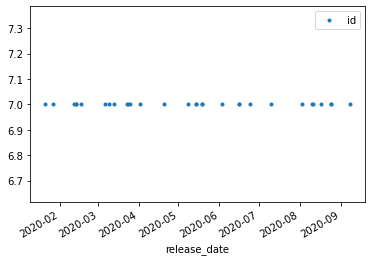

In [75]:
# GB=DF.groupby([(DF.index.year),(DF.index.month)]).sum()
timeseries.groupby([(timeseries.index.year),(timeseries.index.month)])
service = timeseries.loc[timeseries['name'] == 'cloudformation']
service.plot(style='.')



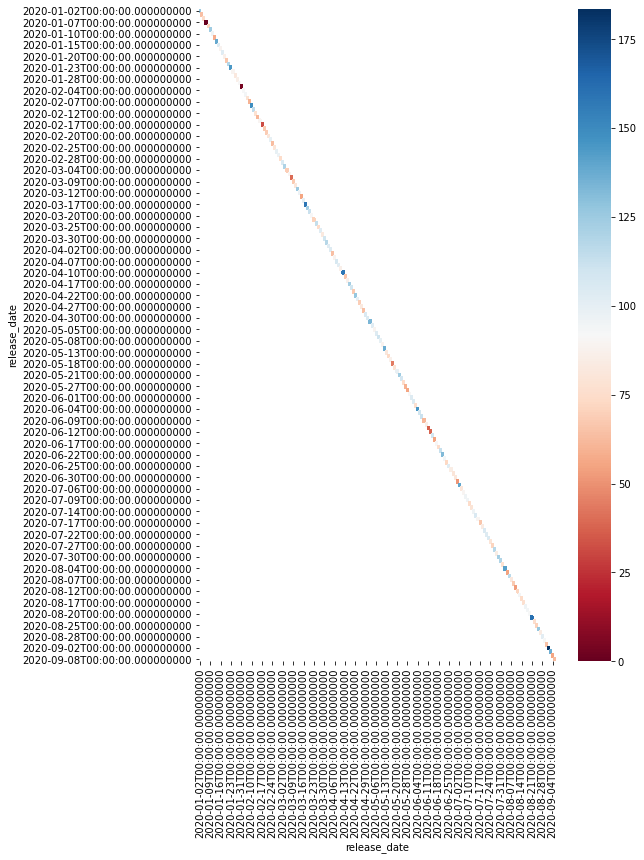

In [77]:
heatmap_data = pd.pivot_table(service_release_df,values='id', index=['name'], columns='release_date')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap="RdBu")